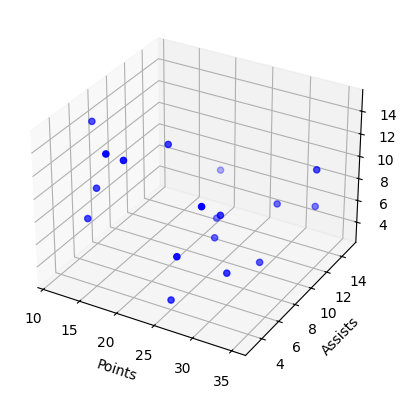

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
data = pd.read_csv("/Users/ayushbhakat/Desktop/sem-5/ML/Endsem/kmeans_Q1.csv")
fig = plt.figure()
ax= fig.add_subplot(111,projection='3d')
ax.scatter(data['Points'],data['Assists'],data['Rebounds'],color = 'b')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.show()
data = np.array(data)

In [29]:
class KMeans:
    def __init__(self,data,k_max):
        self.data = data
        self.k_max = k_max
        self.history = []
    def initialize_centroids(self,k):
        return self.data[np.random.choice(self.data.shape[0],k,replace = False)]
    def assign_labels(self, centroids):
        # dist = lambda p,c : np.sqrt(np.sum([(p[i]-c[i])**2 for i in range(3)],axis = 0))
        dist = lambda p,c : np.sqrt((p[0]-c[0])**2 + (p[1]-c[1])**2 + (p[2]-c[2])**2)
        labels = []
        for p in np.array(self.data):
            c_idx = np.argmin(list(map(lambda c : dist(p,c), centroids)))
            labels.append(c_idx)
        return np.array(labels)
    def update_centroid(self,labels,k):
        return np.array([self.data[labels == i].mean(axis=0) for i in range(k)])
    def fit(self,epoch = 10):
        for k in range(2,self.k_max+1):
            centroids = self.initialize_centroids(k)
            for _ in range(epoch):
                labels = self.assign_labels(centroids)
                centroids = self.update_centroid(labels,k)
            self.history.append((k,centroids,labels))
    def plot_clusters_3d(self):
        num_plots = len(self.history)
        k,centroids,labels = self.history[0]
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.scatter(self.data[:, 0], self.data[:, 1], self.data[:, 2], c=labels, cmap='viridis')
        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X')
        ax.set_title(f'K-Means Clustering (k={k})')
        ax.set_xlabel('Points')
        ax.set_ylabel('Assists')
        ax.set_zlabel('Rebounds')
        plt.show()

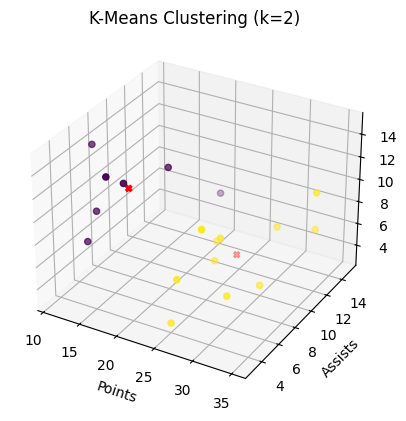

In [34]:
model = KMeans(data,k_max = 10)
model.fit(epoch = 300)
model.plot_clusters_3d()

In [35]:
WCSS = lambda c,p : np.sum(list(map(lambda point : np.sum([(c[i]-point[i])**2 for i in range(3)]),p)))
history = model.history
k_values = []
for k,c,labels in history:
    k_values.append((k,np.sum([WCSS(c[i],data[labels==i]) for i in np.unique(labels)])))
print(k_values)

[(2, np.float64(597.1428571428571)), (3, np.float64(447.7261904761905)), (4, np.float64(399.05555555555554)), (5, np.float64(334.9166666666667)), (6, np.float64(215.50000000000003)), (7, np.float64(184.3)), (8, np.float64(145.66666666666666)), (9, np.float64(104.66666666666666)), (10, np.float64(110.16666666666666))]


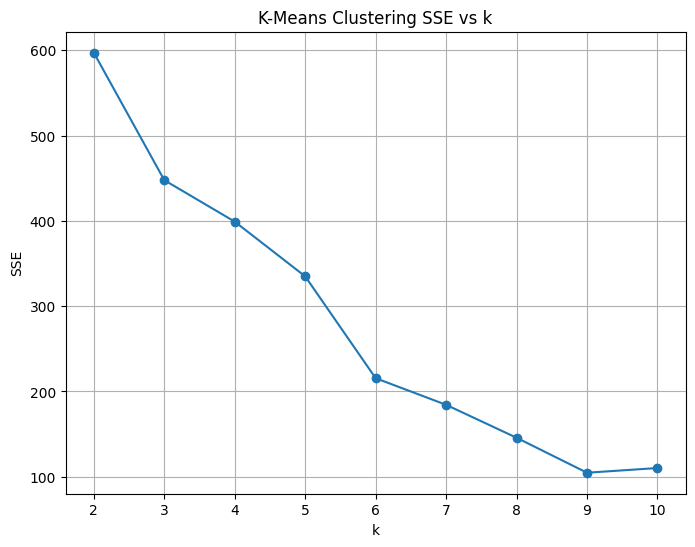

In [36]:
k_values,sse_values = zip(*k_values)
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('K-Means Clustering SSE vs k')
plt.grid(True)
plt.show()


In [ ]:
#silhouette score
history = model.history
a = lambda c,p